In [8]:
pip install pandas numpy scikit-learn nltk

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


**The distribution of toxicity labels (how common each type is).
Comment length statistics (minimum, maximum, average length).**

In [10]:
import pandas as pd

# Load the dataset to inspect its structure

train_data = df = pd.read_csv('/content/train (1).csv')

# Display basic information about the dataset
train_data.info()

# Display the first few rows of the dataset
train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Step 2: EDA


Analysing the distribution of toxicity labels in the training data.
Comment lengths to guide preprocessing steps.

In [11]:
# Load the sample submission file to understand the required format
sample_submission_path = ('/content/sample_submission.csv')
sample_submission = pd.read_csv(sample_submission_path)

# Display the structure of the sample submission
sample_submission.info()

# Display the first few rows of the sample submission file
sample_submission.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             153164 non-null  object 
 1   toxic          153164 non-null  float64
 2   severe_toxic   153164 non-null  float64
 3   obscene        153164 non-null  float64
 4   threat         153164 non-null  float64
 5   insult         153164 non-null  float64
 6   identity_hate  153164 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.2+ MB


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


# Text Preprocessing
We’ll clean the text to remove noise and prepare it for feature extraction:

Remove special characters, extra spaces, and URLs.
Convert text to lowercase.

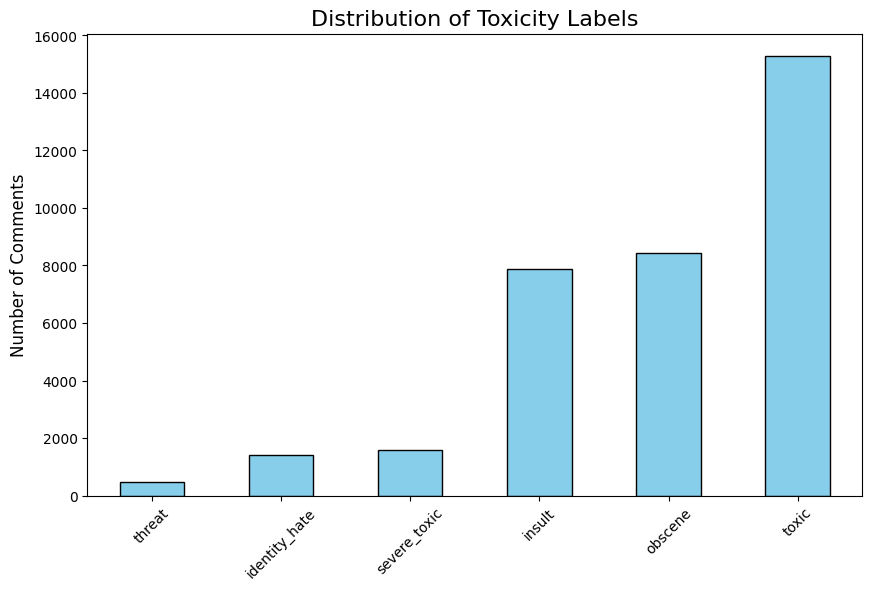

,comment_length
count,159571.000000
mean,394.073221
std,590.720282
min,6.000000
25%,96.000000
50%,205.000000
75%,435.000000
max,5000.000000


In [12]:
import matplotlib.pyplot as plt

# Calculate the distribution of each toxicity label
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_distribution = train_data[label_columns].sum().sort_values()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Toxicity Labels', fontsize=16)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Calculate comment lengths
train_data['comment_length'] = train_data['comment_text'].apply(len)

# Display comment length statistics
comment_length_stats = train_data['comment_length'].describe()
comment_length_stats


In [13]:
import pandas as pd
import re

## Define a Cleaning Function
Create a function to clean the text data.

In [14]:
def clean_text(text):
    """
    Function to clean comment text by:
    - Lowercasing text
    - Removing special characters and numbers
    - Stripping extra whitespaces
    """
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()
    return text


## Apply the Cleaning Function
Load your dataset and apply the cleaning function to the comment_text column.

In [15]:
# Load the train.csv file
train_data = pd.read_csv("/content/train (1).csv")

# Apply the cleaning function
train_data['cleaned_comment'] = train_data['comment_text'].apply(clean_text)

# Preview cleaned data
print(train_data[['comment_text', 'cleaned_comment']].head())


                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                     cleaned_comment  
0  explanation why the edits made under my userna...  
1  daww he matches this background colour im seem...  
2  hey man im really not trying to edit war its j...  
3  more i cant make any real suggestions on impro...  
4  you sir are my hero any chance you remember wh...  


*Save the Cleaned Dataset*

In [16]:
train_data.to_csv("cleaned_train.csv", index=False)


# Feature Extraction
## To use text data in a machine learning model, we need to convert it into numerical representations. Two common approaches are:

- TF-IDF (Term Frequency-Inverse Document Frequency):

- Captures the importance of words in the comments by considering their frequency in the dataset.
Suitable for traditional ML algorithms (Logistic Regression, Random Forest, etc.)

Word Embeddings:

Converts words into dense vector representations (e.g., using pre-trained embeddings like GloVe, Word2Vec, or contextual embeddings like BERT).
Suitable for deep learning models.

In [17]:
#Using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(train_data['cleaned_comment'])

# Labels (target variables)
y = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]


## Split Data for Training and Validation

In [18]:
#Split the data into training and validation sets.

from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training
Train a Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Train a model for one label (e.g., "toxic")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train['toxic'])

# Predict on validation set
y_pred_toxic = model.predict(X_val)

# Evaluate the F1 score
f1 = f1_score(y_val['toxic'], y_pred_toxic, average='macro')
print(f"F1 Score for 'toxic': {f1:.2f}")


F1 Score for 'toxic': 0.85


## Train Models for All Labels
To train models for all labels in one go:

In [20]:
from sklearn.multioutput import MultiOutputClassifier

# Multi-output classifier
multi_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
multi_model.fit(X_train, y_train)

# Predict on validation set
y_pred = multi_model.predict(X_val)

# Calculate F1 scores for each label
f1_scores = {}
for i, label in enumerate(y_train.columns):
    f1_scores[label] = f1_score(y_val.iloc[:, i], y_pred[:, i], average='macro')
    print(f"F1 Score for '{label}': {f1_scores[label]:.2f}")

# Average F1 score
avg_f1 = sum(f1_scores.values()) / len(f1_scores)
print(f"Average F1 Score: {avg_f1:.2f}")


F1 Score for 'toxic': 0.85
F1 Score for 'severe_toxic': 0.68
F1 Score for 'obscene': 0.86
F1 Score for 'threat': 0.60
F1 Score for 'insult': 0.81
F1 Score for 'identity_hate': 0.61
Average F1 Score: 0.74


## Prepare Predictions for Submission
- Use your model to predict probabilities for the test data.
- Save the predictions in the required format.

In [21]:
# Load test data
test_data = pd.read_csv("/content/test.csv")

# Transform test comments
X_test = tfidf_vectorizer.transform(test_data['comment_text'])

# Predict probabilities
test_pred = multi_model.predict_proba(X_test)

# Format the predictions
submission = pd.DataFrame({
    "id": test_data['id'],
    "toxic": test_pred[0][:, 1],
    "severe_toxic": test_pred[1][:, 1],
    "obscene": test_pred[2][:, 1],
    "threat": test_pred[3][:, 1],
    "insult": test_pred[4][:, 1],
    "identity_hate": test_pred[5][:, 1],
})

# Save to CSV
submission.to_csv("submission.csv", index=False)


 **Toxicity Label Co-occurrence**
Analyze how often toxicity types co-occur in comments.
A heatmap of the correlation matrix can show relationships between labels.

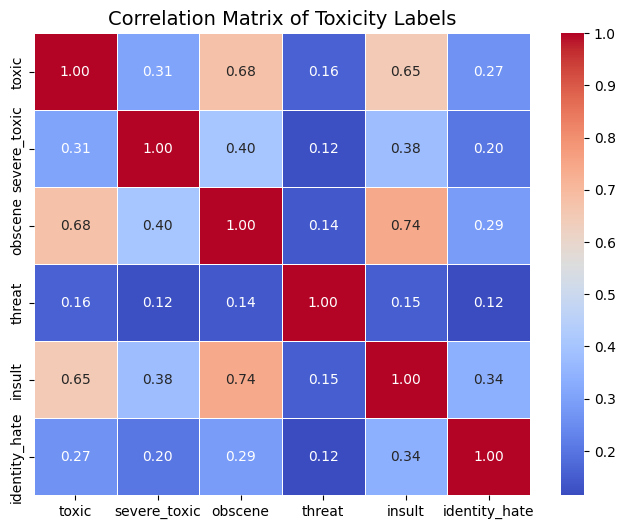

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for toxicity labels
correlation_matrix = train_data[label_columns].corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Toxicity Labels", fontsize=14)
plt.show()


 **Comment Length vs Toxicity**
Visualize how comment length differs between toxic and non-toxic comments.
Use box plots or histograms.

In [23]:
# Add a 'toxic_any' column (1 if any label is 1, else 0)
train_data['toxic_any'] = train_data[label_columns].max(axis=1)
print(train_data.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'cleaned_comment', 'toxic_any'],
      dtype='object')


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  \
0             0        0       0       0              0   
1             0        0       0       0              0   
2             0        0       0       0              0   
3             0        0       0       0              0   
4             0        0       0       0              0   

                                     cleaned_comment  toxic_any  \
0  explanation why the edits made under my userna...          0   
1  daww he matches this 

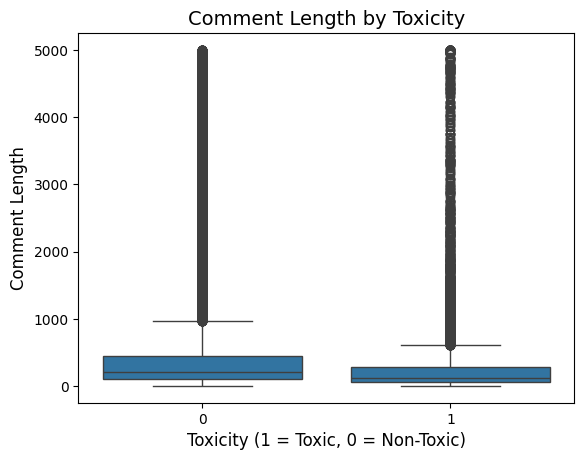

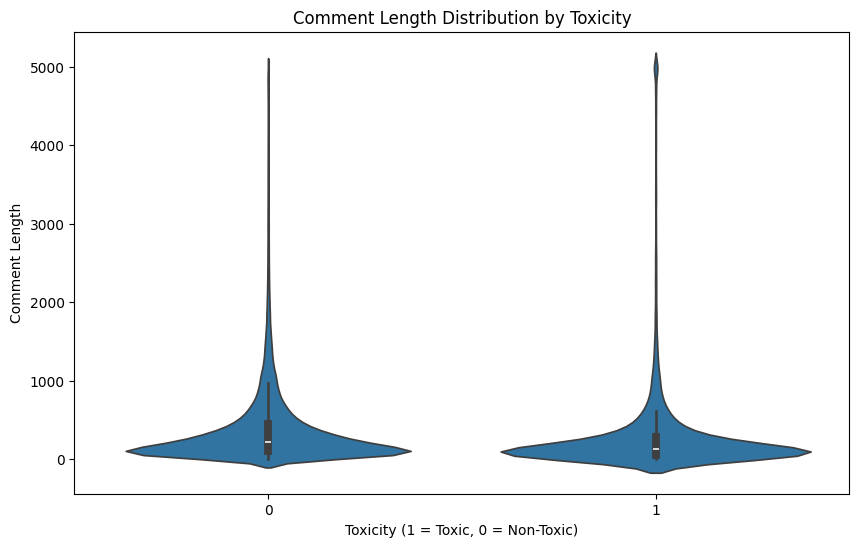

In [24]:
# Calculate the length of each comment and create a new column
train_data['comment_length'] = train_data['comment_text'].apply(len)
print(train_data.head())
sns.boxplot(x='toxic_any', y='comment_length', data=train_data)
plt.title("Comment Length by Toxicity", fontsize=14)
plt.xlabel("Toxicity (1 = Toxic, 0 = Non-Toxic)", fontsize=12)
plt.ylabel("Comment Length", fontsize=12)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plot for toxic vs non-toxic comments
plt.figure(figsize=(10, 6))
sns.violinplot(x='toxic_any', y='comment_length', data=train_data)
plt.title("Comment Length Distribution by Toxicity")
plt.xlabel("Toxicity (1 = Toxic, 0 = Non-Toxic)")
plt.ylabel("Comment Length")
plt.show()



 **Label Distribution in the Training Data**
Visualize how many comments belong to each toxicity category using a bar plot (we already did this earlier, but we can refine it).

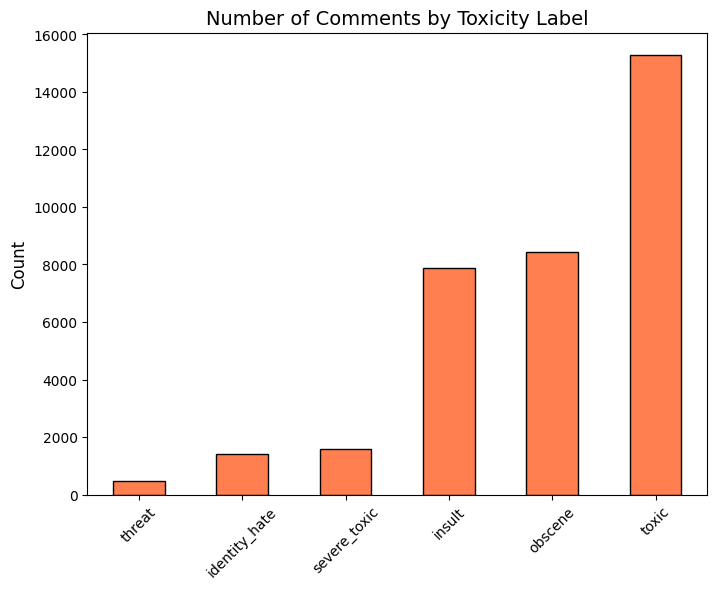

In [25]:
plt.figure(figsize=(8, 6))
train_data[label_columns].sum().sort_values().plot(
    kind="bar", color="coral", edgecolor="black"
)
plt.title("Number of Comments by Toxicity Label", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


**TF-IDF Word Importance**
After training the TF-IDF model, visualize the most important words for the toxic label.

<ipython-input-26-738592e82ffc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="word", data=word_importance.head(20), palette="viridis")


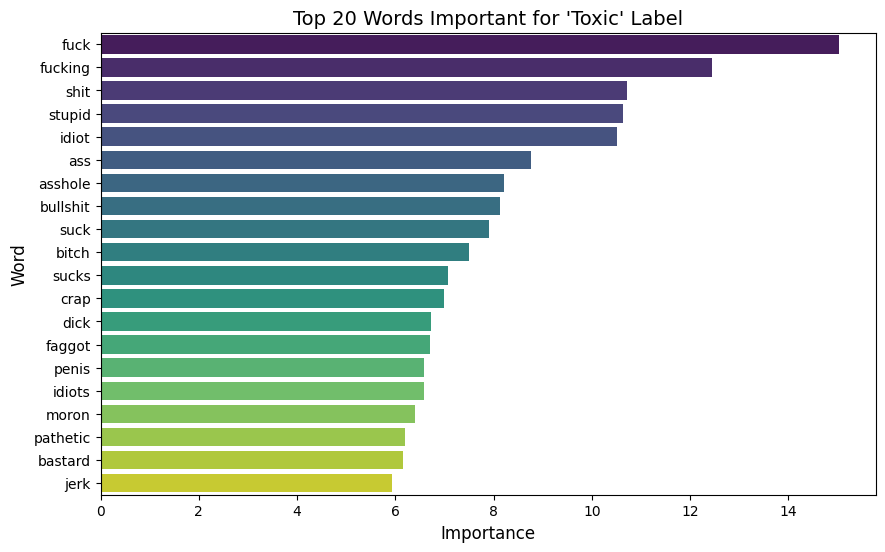

In [26]:
import seaborn as sns

#
# Get feature names and coefficients for the toxic label
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]  # Model trained on the 'toxic' label

# Create a DataFrame of features and coefficients
word_importance = pd.DataFrame({
    "word": feature_names,
    "importance": coefficients
}).sort_values(by="importance", ascending=False)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="word", data=word_importance.head(20), palette="viridis")
plt.title("Top 20 Words Important for 'Toxic' Label", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.show()


In [27]:
pd.read_csv('/content/sample_submission.csv')

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


# ALTERNATE
### Explicitly integrating these steps into our pipeline to observe any differences in model performance!
Enhancing Preprocessing with Tokenization, Lemmatization, and Stop Word Removal

In [31]:
!pip install nltk spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
import spacy

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Alternatively, use spaCy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    """
    Perform tokenization, stop word removal, and lemmatization on text.
    """
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and special characters
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return " ".join(tokens)

# Apply preprocessing to the cleaned comments
train_data['processed_comment'] = train_data['cleaned_comment'].apply(preprocess_text)

# View sample output
train_data[['cleaned_comment', 'processed_comment']].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_comment,processed_comment
0,explanation why the edits made under my userna...,explanation edits made username hardcore metal...
1,daww he matches this background colour im seem...,daww match background colour im seemingly stuc...
2,hey man im really not trying to edit war its j...,hey man im really trying edit war guy constant...
3,more i cant make any real suggestions on impro...,cant make real suggestion improvement wondered...
4,you sir are my hero any chance you remember wh...,sir hero chance remember page thats


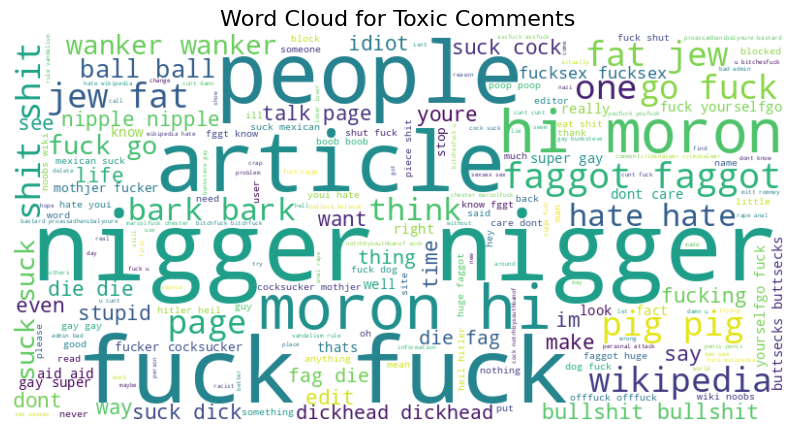

In [32]:
from wordcloud import WordCloud

# Generate a word cloud for toxic comments
toxic_comments = " ".join(train_data[train_data['toxic'] == 1]['processed_comment'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(toxic_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Toxic Comments", fontsize=16)
plt.show()


<ipython-input-33-714233924224>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=common_words, palette="viridis")


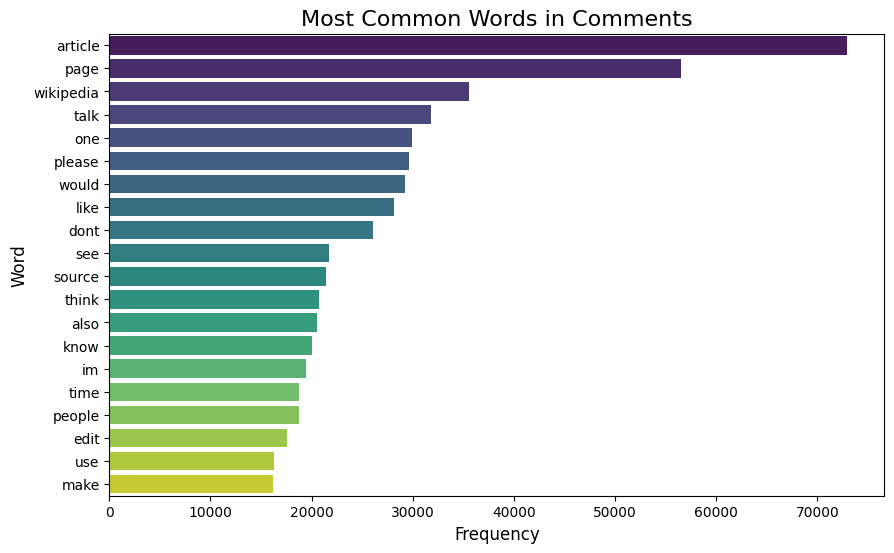

In [33]:
from collections import Counter

# Count word frequencies
word_counts = Counter(" ".join(train_data['processed_comment']).split())

# Get the most common words
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=common_words, palette="viridis")
plt.title("Most Common Words in Comments", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.show()


In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words=None)
X = tfidf_vectorizer.fit_transform(train_data['processed_comment'])


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words=None)

# Fit and transform the cleaned text (processed comment)
X = tfidf_vectorizer.fit_transform(train_data['processed_comment'])

# Labels (target variables)
y = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MultiOutput Classifier with Logistic Regression
multi_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
multi_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = multi_model.predict(X_val)

# Calculate F1 scores for each label
f1_scores = {}
for i, label in enumerate(y_train.columns):
    f1_scores[label] = f1_score(y_val.iloc[:, i], y_pred[:, i], average='macro')
    print(f"F1 Score for '{label}': {f1_scores[label]:.2f}")

# Average F1 score
avg_f1 = sum(f1_scores.values()) / len(f1_scores)
print(f"Average F1 Score: {avg_f1:.2f}")


F1 Score for 'toxic': 0.86
F1 Score for 'severe_toxic': 0.68
F1 Score for 'obscene': 0.87
F1 Score for 'threat': 0.62
F1 Score for 'insult': 0.81
F1 Score for 'identity_hate': 0.63
Average F1 Score: 0.74


In [37]:

# Apply the preprocessing function to the test set
test_data['processed_comment'] = test_data['comment_text'].apply(preprocess_text)

# View a sample of the processed test comments
test_data[['comment_text', 'processed_comment']].head()


,comment_text,processed_comment
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...
1,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,":If you have a look back at the source, the in...",look back source information updated correct f...
4,I don't anonymously edit articles at all.,anonymously edit article


In [38]:
# Transform the test set using the fitted TF-IDF vectorizer
X_test = tfidf_vectorizer.transform(test_data['processed_comment'])


In [43]:
# Predict the toxicity labels on the test set
test_predictions = multi_model.predict(X_test)

# Convert predictions to a DataFrame for easy handling
test_predictions_df = pd.DataFrame(test_predictions, columns=y_train.columns)

# Add 'id' column from test data (assuming it exists in test_data)
test_predictions_df['id'] = test_data['id']


In [44]:
# Reorder columns to match the submission format
submission2 = test_predictions_df[['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Save the submission file
submission2.to_csv("submission2.csv", index=False)

# Display the first few rows to verify the format
submission2.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,0,1,0,1,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
